In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import chex
from functools import partial
from typing import Callable
import os
from exciting_environments import PMSM
import matplotlib.pyplot as plt

In [32]:
BATCH_SIZE=5
new_motor_env = PMSM(
    saturated=True,
    batch_size=BATCH_SIZE,
    control_state=["torque"])


In [33]:
PRNGKey = jax.vmap(jax.random.PRNGKey)(np.random.randint(0, 2**31, size=(BATCH_SIZE,)))

In [35]:
obs, motor_env_state = new_motor_env.reset() #PRNGKey
next_state=motor_env_state
i_dqs=[]
for _ in range(1000):
    act=jnp.repeat(jnp.array([0.03,0.03])[:,None],BATCH_SIZE,axis=1).T
    obs_next,next_state=new_motor_env.vmap_step(next_state,act)
    i_dqs.append(obs_next[0,0:2])

In [13]:
obs_next,next_state=new_motor_env.vmap_step(next_state,act)

In [14]:
obs_next

Array([[-0.4893222 , -0.05131209,  1.        , -0.01984238,  0.9980261 ,
         0.0628005 ,  0.0285535 ,  0.03137989],
       [-0.4893222 , -0.05131209,  1.        , -0.01984238,  0.9980261 ,
         0.0628005 ,  0.0285535 ,  0.03137989],
       [-0.4893222 , -0.05131209,  1.        , -0.01984238,  0.9980261 ,
         0.0628005 ,  0.0285535 ,  0.03137989],
       [-0.4893222 , -0.05131209,  1.        , -0.01984238,  0.9980261 ,
         0.0628005 ,  0.0285535 ,  0.03137989],
       [-0.4893222 , -0.05131209,  1.        , -0.01984238,  0.9980261 ,
         0.0628005 ,  0.0285535 ,  0.03137989]], dtype=float32)

Text(0, 0.5, 'i_q')

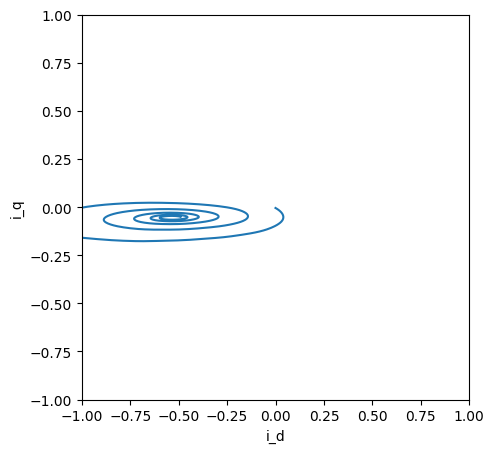

In [15]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(jnp.array(i_dqs)[:,0],jnp.array(i_dqs)[:,1]) #,label="currents"
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("i_d")
ax.set_ylabel("i_q")
#ax.legend()

### PMSM with GymWrapper

In [36]:
from exciting_environments import GymWrapper

In [37]:
BATCH_SIZE=5
new_motor_env = PMSM(
    batch_size=BATCH_SIZE,
    saturated=False)
gym_pmsm= GymWrapper(env=new_motor_env)

In [38]:
gym_pmsm.reset()
i_dqs2=[]
for _ in range(1000):
    act=jnp.repeat(jnp.array([0.03,0.03])[:,None],BATCH_SIZE,axis=1).T
    obs_next,_,_,_=gym_pmsm.step(act)
    i_dqs2.append(obs_next[0,0:2])

TracerBoolConversionError: Attempted boolean conversion of traced array with shape bool[]..
The error occurred while tracing the function generate_new_ref at D:\Dokumente\Studium\SHK2\projects\environments\exciting-environments\exciting_environments\Gym_Wrapper.py:167 for cond. This concrete value was not available in Python because it depends on the value of the argument env_properties[<flat index 0>].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerBoolConversionError

Text(0, 0.5, 'i_q')

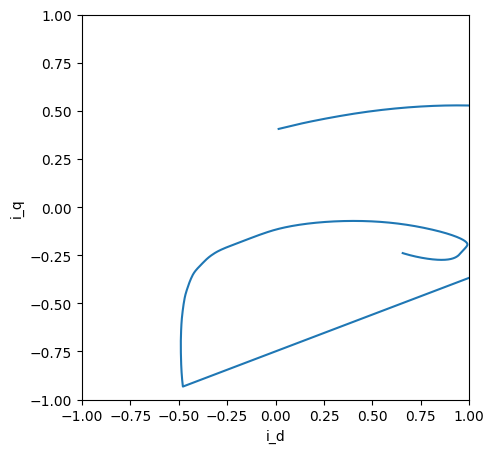

In [21]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(jnp.array(i_dqs2)[:,0],jnp.array(i_dqs2)[:,1]) #,label="currents"
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("i_d")
ax.set_ylabel("i_q")
#ax.legend()